In [2]:
from tkinter import *

In [4]:
from PIL import ImageGrab
from PIL import Image
from pathlib import Path
import time

In [88]:
master = Tk()
periode = 2000

canvas_width = 622
canvas_height = 493 - 24
w = Canvas(master, 
           width=canvas_width,
           height=canvas_height)
master.geometry('%dx%d+%d+%d' % (canvas_width, canvas_height, 0, 0))
master.after(periode, handCatcher)
w.pack()
mainloop();

Exception in Tkinter callback


KeyboardInterrupt: 

In [87]:
def getPokerTable():
    im = ImageGrab.grab(bbox=(0,23,622,516))
    im = im.convert("RGB");
    im.save("screen_capture.jpg", "JPEG")
    return im

def getScreenShotPath():
    files = Path.cwd().glob('**/*.jpg')
    files = [x for x in files]
    screen = files[0]
    return screen

def cropSet(im):
    size = im.size
    largeur = size[0]
    longueur  = size[1]
    x_range = 100
    x_from = largeur/2
    xmin = round(x_from - x_range)
    xmax = round(x_from + x_range)
    y_range = 90
    y_from = longueur*0.75
    y_from = round(y_from)
    ymin = round(y_from - y_range)
    ymax = round(y_from + y_range)
    return (xmin, ymin, xmax, ymax)

def getPokerTableImage():
    return Image.open(getScreenShotPath())

def getPlayer(im):
    crop = cropSet(im)
    im = im.crop((crop[0],crop[1],crop[2],crop[3]))
    return im

def processFromScreenToPlayerImage():
    getPokerTable()
    im = getPokerTableImage()
    return getPlayer(im)

def handCatcher():
    processFromScreenToPlayerImage()
    master.after(periode, handCatcher)

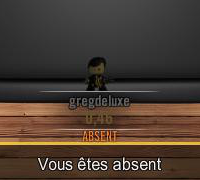

In [79]:
time.sleep(5)
hand = processFromScreenToPlayerImage();
hand